In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Prepare

In [ ]:
%cd /content/drive/MyDrive/DS201/RetinaNET
!git clone https://github.com/thangnch/MiAI_Trafficsign_Retinanet

In [ ]:
%cd /content/drive/MyDrive/DS201/RetinaNET/
!git clone https://github.com/fizyr/keras-retinanet

In [ ]:
%cd /content/drive/MyDrive/DS201/RetinaNET/keras-retinanet/
!python setup.py build_ext --inplace

### Data

In [ ]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

%cd /content/drive/MyDrive/DS201_DeepLearning_VNTF_22/
# %cd /content/drive/MyDrive/DS201/RetinaNET/

def xml_to_csv(path, name_directory):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()

        name_file_xml = xml_file.strip(path).strip('.xml')
        print(name_directory + '/im' + name_file_xml + '.png')

        for member in root.findall('object'):
            value = (
                      # 'images/' + root.find('filename').text,
                      # name_directory + '/' + root.find('filename').text,
                     name_directory + '/im' + name_file_xml + '.png',
                     
                      int(member[4][0].text),
                      int(member[4][1].text),
                      int(member[4][2].text),
                      int(member[4][3].text),
                      member[0].text
                    )
            xml_list.append(value)
    column_name = ['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'class']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

# for directory in ['train','test']:
for directory in ['train','test']:
        image_path = os.path.join('dataset/split_data/{}'.format(directory))
        xml_df = xml_to_csv(image_path, directory)
        xml_df.to_csv('dataset/split_data/{}_labels_RetinaNet.csv'.format(directory), header=False, index=None)
        print('Successfully converted xml to csv.')

## Train

In [ ]:
!pip install keras-resnet

### Pre Train

#### 3 epoch đầu

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/train.py --weights snapshots/resnet50_coco_best_v2.1.0.h5 --epochs 64 --steps 1656 --batch-size 2 csv DS201_DeepLearning_VNTF_22/dataset/split_data/train_labels_RetinaNet.csv DS201_DeepLearning_VNTF_22/dataset/split_data/classes_RetinaNet.txt

#### các epoch tiếp theo

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/train.py --weights snapshots/3_resnet50_csv_03.h5 --epochs 64 --steps 1656 --batch-size 2 csv DS201_DeepLearning_VNTF_22/dataset/split_data/train_labels_RetinaNet.csv DS201_DeepLearning_VNTF_22/dataset/split_data/classes_RetinaNet.txt

#### epoch kế tiếp

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/train.py --weights snapshots/4_resnet50_csv_16.h5 --epochs 64 --steps 1656 --batch-size 2 csv DS201_DeepLearning_VNTF_22/dataset/split_data/train_labels_RetinaNet.csv DS201_DeepLearning_VNTF_22/dataset/split_data/classes_RetinaNet.txt

#### các epoch cuối cùng

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/train.py --weights snapshots/5_resnet50_csv_17.h5 --epochs 64 --steps 1656 --batch-size 2 csv DS201_DeepLearning_VNTF_22/dataset/split_data/train_labels_RetinaNet.csv DS201_DeepLearning_VNTF_22/dataset/split_data/classes_RetinaNet.txt

## Convert to use

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/convert_model.py snapshots/resnet50_csv_18.h5 resnet50_csv_18.h5

## Evaluate

In [ ]:
# mAP = 0.7191
# mAP@0.50 = 0.8700
# mAP@0.55 = 0.8619
# mAP@0.60 = 0.8472
# mAP@0.65 = 0.8336
# mAP@0.70 = 0.8149
# mAP@0.75 = 0.7854
# mAP@0.80 = 0.7466
# mAP@0.85 = 0.6791
# mAP@0.90 = 0.5394
# mAP@0.95 = 0.2133

### IoU = 0.50

680 instances of class banh_bo with average precision: 0.8314\
114 instances of class banh_bot_loc with average precision: 0.7858\
570 instances of class banh_cam with average precision: 0.9241\
181 instances of class banh_chung with average precision: 0.8694\
116 instances of class banh_cuon with average precision: 0.8436\
352 instances of class banh_da_lon with average precision: 0.9204\
234 instances of class banh_it with average precision: 0.8634\
429 instances of class banh_khot with average precision: 0.9292\
151 instances of class banh_mi with average precision: 0.9152\
356 instances of class banh_tet with average precision: 0.8526\
121 instances of class banh_xeo with average precision: 0.8452\
303 instances of class cha_lua with average precision: 0.7317\
120 instances of class che_troi_nuoc with average precision: 0.9038\
310 instances of class goi_cuon with average precision: 0.8688\
422 instances of class nem_ran with average precision: 0.8765\
103 instances of class pho with average precision: 0.9583\
Inference time for 1422 images: 0.2246\
mAP@0.5 using the weighted average of precisions among classes: 0.8710\
mAP@0.5: 0.8700

### Iou = 0.55

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/evaluate.py --iou-threshold 0.55 csv DS201_DeepLearning_VNTF_22/dataset/split_data/test_labels_RetinaNet.csv DS201_DeepLearning_VNTF_22/dataset/split_data/classes_RetinaNet.txt resnet50_csv_18.h5

/content/drive/MyDrive
Loading model, this may take a second...
2023-02-03 11:31:30.089282: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running network: 100% (1422 of 1422) |####| Elapsed Time: 0:10:53 Time:  0:10:53
Parsing annotations: 100% (1422 of 1422) || Elapsed Time: 0:00:00 Time:  0:00:00
680 instances of class banh_bo with average precision: 0.8278
114 instances of class banh_bot_loc with average precision: 0.7812
570 instances of class banh_cam with average precision: 0.9213
181 instances of class banh_chung with average precision: 0.8588
116 instances of class banh_cuon with average precision: 0.8268
352 instances of class banh_da_lon with average precision: 0.9132
234 instances of class banh_it with average precision: 0.8587
429 instances of class banh_khot with average precision: 0.9285
151 instances of class banh_mi with average p

### Iou = 0.60

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/evaluate.py --iou-threshold 0.60 csv DS201_DeepLearning_VNTF_22/dataset/split_data/test_labels_RetinaNet.csv DS201_DeepLearning_VNTF_22/dataset/split_data/classes_RetinaNet.txt resnet50_csv_18.h5

/content/drive/MyDrive
Loading model, this may take a second...
2023-02-03 11:42:49.165447: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running network: 100% (1422 of 1422) |####| Elapsed Time: 0:06:25 Time:  0:06:25
Parsing annotations: 100% (1422 of 1422) || Elapsed Time: 0:00:00 Time:  0:00:00
680 instances of class banh_bo with average precision: 0.8201
114 instances of class banh_bot_loc with average precision: 0.7812
570 instances of class banh_cam with average precision: 0.9173
181 instances of class banh_chung with average precision: 0.8524
116 instances of class banh_cuon with average precision: 0.8004
352 instances of class banh_da_lon with average precision: 0.9090
234 instances of class banh_it with average precision: 0.8364
429 instances of class banh_khot with average precision: 0.9230
151 instances of class banh_mi with average p

### Iou = 0.65

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/evaluate.py --iou-threshold 0.65 csv DS201_DeepLearning_VNTF_22/dataset/split_data/test_labels_RetinaNet.csv DS201_DeepLearning_VNTF_22/dataset/split_data/classes_RetinaNet.txt resnet50_csv_18.h5

/content/drive/MyDrive
Loading model, this may take a second...
2023-02-03 11:49:27.410484: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running network: 100% (1422 of 1422) |####| Elapsed Time: 0:06:10 Time:  0:06:10
Parsing annotations: 100% (1422 of 1422) || Elapsed Time: 0:00:00 Time:  0:00:00
680 instances of class banh_bo with average precision: 0.8126
114 instances of class banh_bot_loc with average precision: 0.7812
570 instances of class banh_cam with average precision: 0.9122
181 instances of class banh_chung with average precision: 0.8424
116 instances of class banh_cuon with average precision: 0.7633
352 instances of class banh_da_lon with average precision: 0.9054
234 instances of class banh_it with average precision: 0.8202
429 instances of class banh_khot with average precision: 0.9213
151 instances of class banh_mi with average p

### Iou = 0.70

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/evaluate.py --iou-threshold 0.70 csv DS201_DeepLearning_VNTF_22/dataset/split_data/test_labels_RetinaNet.csv DS201_DeepLearning_VNTF_22/dataset/split_data/classes_RetinaNet.txt resnet50_csv_18.h5

/content/drive/MyDrive
Loading model, this may take a second...
2023-02-03 11:55:50.338045: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running network: 100% (1422 of 1422) |####| Elapsed Time: 0:06:12 Time:  0:06:12
Parsing annotations: 100% (1422 of 1422) || Elapsed Time: 0:00:00 Time:  0:00:00
680 instances of class banh_bo with average precision: 0.7981
114 instances of class banh_bot_loc with average precision: 0.7812
570 instances of class banh_cam with average precision: 0.9055
181 instances of class banh_chung with average precision: 0.8334
116 instances of class banh_cuon with average precision: 0.7483
352 instances of class banh_da_lon with average precision: 0.8967
234 instances of class banh_it with average precision: 0.8039
429 instances of class banh_khot with average precision: 0.9124
151 instances of class banh_mi with average p

### IoU = 0.75

680 instances of class banh_bo with average precision: 0.7725\
114 instances of class banh_bot_loc with average precision: 0.7579\
570 instances of class banh_cam with average precision: 0.8918\
181 instances of class banh_chung with average precision: 0.8184\
116 instances of class banh_cuon with average precision: 0.6997\
352 instances of class banh_da_lon with average precision: 0.8745\
234 instances of class banh_it with average precision: 0.7870\
429 instances of class banh_khot with average precision: 0.8871\
151 instances of class banh_mi with average precision: 0.8942\
356 instances of class banh_tet with average precision: 0.7872\
121 instances of class banh_xeo with average precision: 0.7243\
303 instances of class cha_lua with average precision: 0.6486\
120 instances of class che_troi_nuoc with average precision: 0.8315\
310 instances of class goi_cuon with average precision: 0.5739\
422 instances of class nem_ran with average precision: 0.8122\
103 instances of class pho with average precision: 0.8060\
Inference time for 1422 images: 0.2235\
mAP@0.75 using the weighted average of precisions among classes: 0.7946\
mAP@0.75: 0.7854

### Iou = 0.80

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/evaluate.py --iou-threshold 0.80 csv DS201_DeepLearning_VNTF_22/dataset/split_data/test_labels_RetinaNet.csv DS201_DeepLearning_VNTF_22/dataset/split_data/classes_RetinaNet.txt resnet50_csv_18.h5

/content/drive/MyDrive
Loading model, this may take a second...
2023-02-03 12:02:15.413103: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running network: 100% (1422 of 1422) |####| Elapsed Time: 0:06:10 Time:  0:06:10
Parsing annotations: 100% (1422 of 1422) || Elapsed Time: 0:00:00 Time:  0:00:00
680 instances of class banh_bo with average precision: 0.7297
114 instances of class banh_bot_loc with average precision: 0.7146
570 instances of class banh_cam with average precision: 0.8593
181 instances of class banh_chung with average precision: 0.7945
116 instances of class banh_cuon with average precision: 0.6714
352 instances of class banh_da_lon with average precision: 0.8203
234 instances of class banh_it with average precision: 0.7715
429 instances of class banh_khot with average precision: 0.8511
151 instances of class banh_mi with average p

### IoU = 0.85

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/evaluate.py --iou-threshold 0.85 csv DS201_DeepLearning_VNTF_22/dataset/split_data/test_labels_RetinaNet.csv DS201_DeepLearning_VNTF_22/dataset/split_data/classes_RetinaNet.txt resnet50_csv_18.h5

/content/drive/MyDrive
Loading model, this may take a second...
2023-02-03 12:08:38.553694: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running network: 100% (1422 of 1422) |####| Elapsed Time: 0:06:12 Time:  0:06:12
Parsing annotations: 100% (1422 of 1422) || Elapsed Time: 0:00:00 Time:  0:00:00
680 instances of class banh_bo with average precision: 0.6433
114 instances of class banh_bot_loc with average precision: 0.6961
570 instances of class banh_cam with average precision: 0.7921
181 instances of class banh_chung with average precision: 0.7546
116 instances of class banh_cuon with average precision: 0.6180
352 instances of class banh_da_lon with average precision: 0.7640
234 instances of class banh_it with average precision: 0.6951
429 instances of class banh_khot with average precision: 0.7173
151 instances of class banh_mi with average p

### IoU = 0.90

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/evaluate.py --iou-threshold 0.90 csv DS201_DeepLearning_VNTF_22/dataset/split_data/test_labels_RetinaNet.csv DS201_DeepLearning_VNTF_22/dataset/split_data/classes_RetinaNet.txt resnet50_csv_18.h5

/content/drive/MyDrive
Loading model, this may take a second...
2023-02-03 12:15:03.034965: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running network: 100% (1422 of 1422) |####| Elapsed Time: 0:06:10 Time:  0:06:10
Parsing annotations: 100% (1422 of 1422) || Elapsed Time: 0:00:00 Time:  0:00:00
680 instances of class banh_bo with average precision: 0.4372
114 instances of class banh_bot_loc with average precision: 0.5678
570 instances of class banh_cam with average precision: 0.6411
181 instances of class banh_chung with average precision: 0.6679
116 instances of class banh_cuon with average precision: 0.5387
352 instances of class banh_da_lon with average precision: 0.6082
234 instances of class banh_it with average precision: 0.5153
429 instances of class banh_khot with average precision: 0.5206
151 instances of class banh_mi with average p

### IoU = 0.95

In [ ]:
%cd /content/drive/MyDrive/

!python DS201/RetinaNET/keras-retinanet/keras_retinanet/bin/evaluate.py --iou-threshold 0.95 csv DS201_DeepLearning_VNTF_22/dataset/split_data/test_labels_RetinaNet.csv DS201_DeepLearning_VNTF_22/dataset/split_data/classes_RetinaNet.txt resnet50_csv_18.h5

/content/drive/MyDrive
Loading model, this may take a second...
2023-02-03 12:21:26.113952: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running network: 100% (1422 of 1422) |####| Elapsed Time: 0:06:11 Time:  0:06:11
Parsing annotations: 100% (1422 of 1422) || Elapsed Time: 0:00:00 Time:  0:00:00
680 instances of class banh_bo with average precision: 0.0923
114 instances of class banh_bot_loc with average precision: 0.2894
570 instances of class banh_cam with average precision: 0.1732
181 instances of class banh_chung with average precision: 0.3036
116 instances of class banh_cuon with average precision: 0.1347
352 instances of class banh_da_lon with average precision: 0.1715
234 instances of class banh_it with average precision: 0.1640
429 instances of class banh_khot with average precision: 0.1267
151 instances of class banh_mi with average p

## Predict

In [ ]:
!pip install keras-retinanet

In [ ]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

%cd /content/drive/MyDrive/
model_path = os.path.join('resnet50_csv_18.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# load label to names mapping for visualization purposes
labels_to_names = {
    0: "banh_bo",
    1: "banh_bot_loc",
    2: "banh_cam",
    3: "banh_chung",
    4: "banh_cuon",
    5: "banh_da_lon",
    6: "banh_it",
    7: "banh_khot",
    8: "banh_mi",
    9: "banh_tet",
    10: "banh_xeo",
    11: "cha_lua",
    12: "che_troi_nuoc",
    13: "goi_cuon",
    14: "nem_ran",
    15: "pho"
}


/content/drive/MyDrive


In [ ]:
def draw_predict(image):
  # copy to draw on
  draw = image.copy()
  # draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

  # correct for image scale
  boxes /= scale
  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < 0.5:
          break
     
      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.2f} {}".format(labels_to_names[label], score*100, '%')
      draw_caption(draw, b, caption)

  return draw

In [ ]:
# load image
img1 = read_image_bgr('/content/drive/MyDrive/DS201_DeepLearning_VNTF_22/dataset/split_data/test/img_0893.png')
img2 = read_image_bgr('/content/drive/MyDrive/DS201_DeepLearning_VNTF_22/dataset/split_data/test/img_0882.png')
img3 = read_image_bgr('/content/drive/MyDrive/DS201_DeepLearning_VNTF_22/dataset/split_data/test/img_1473.png')
img4 = read_image_bgr('/content/drive/MyDrive/DS201_DeepLearning_VNTF_22/dataset/split_data/test/img_1483.png')
img5 = read_image_bgr('/content/drive/MyDrive/DS201_DeepLearning_VNTF_22/dataset/split_data/test/img_1063.png')
img6 = read_image_bgr('/content/drive/MyDrive/DS201_DeepLearning_VNTF_22/dataset/split_data/test/img_1070.png')

### Predict with image

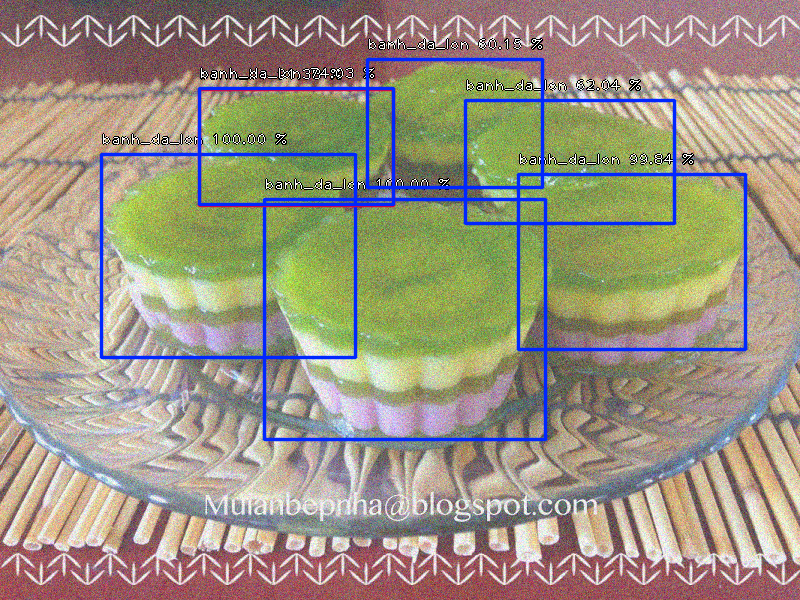

In [ ]:
# Bánh da lợn
cv2_imshow(draw_predict(img1))

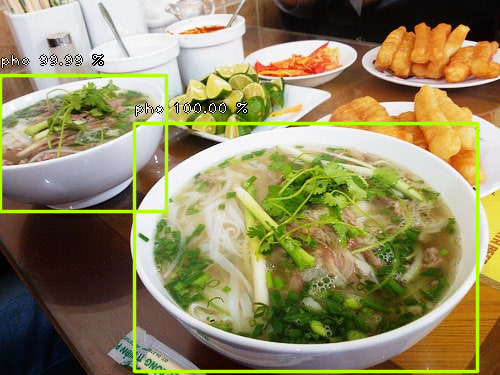

In [ ]:
# Phở
cv2_imshow(draw_predict(img2))

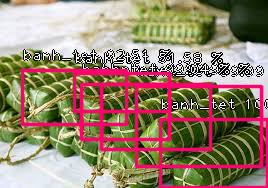

In [ ]:
# Bánh tét
cv2_imshow(draw_predict(img3))

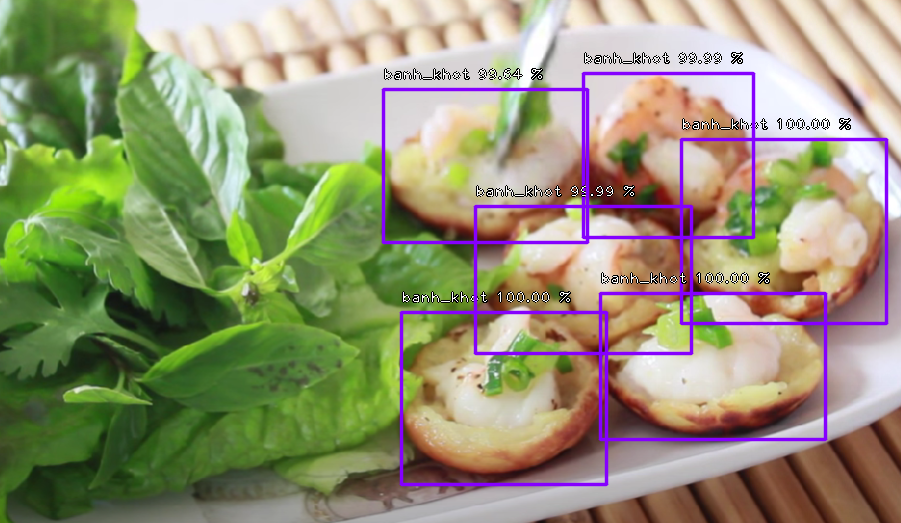

In [ ]:
# Bánh khọt
cv2_imshow(draw_predict(img4))

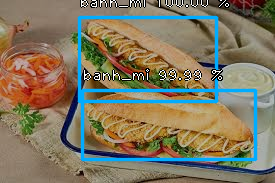

In [ ]:
# Bánh mì
cv2_imshow(draw_predict(img5))

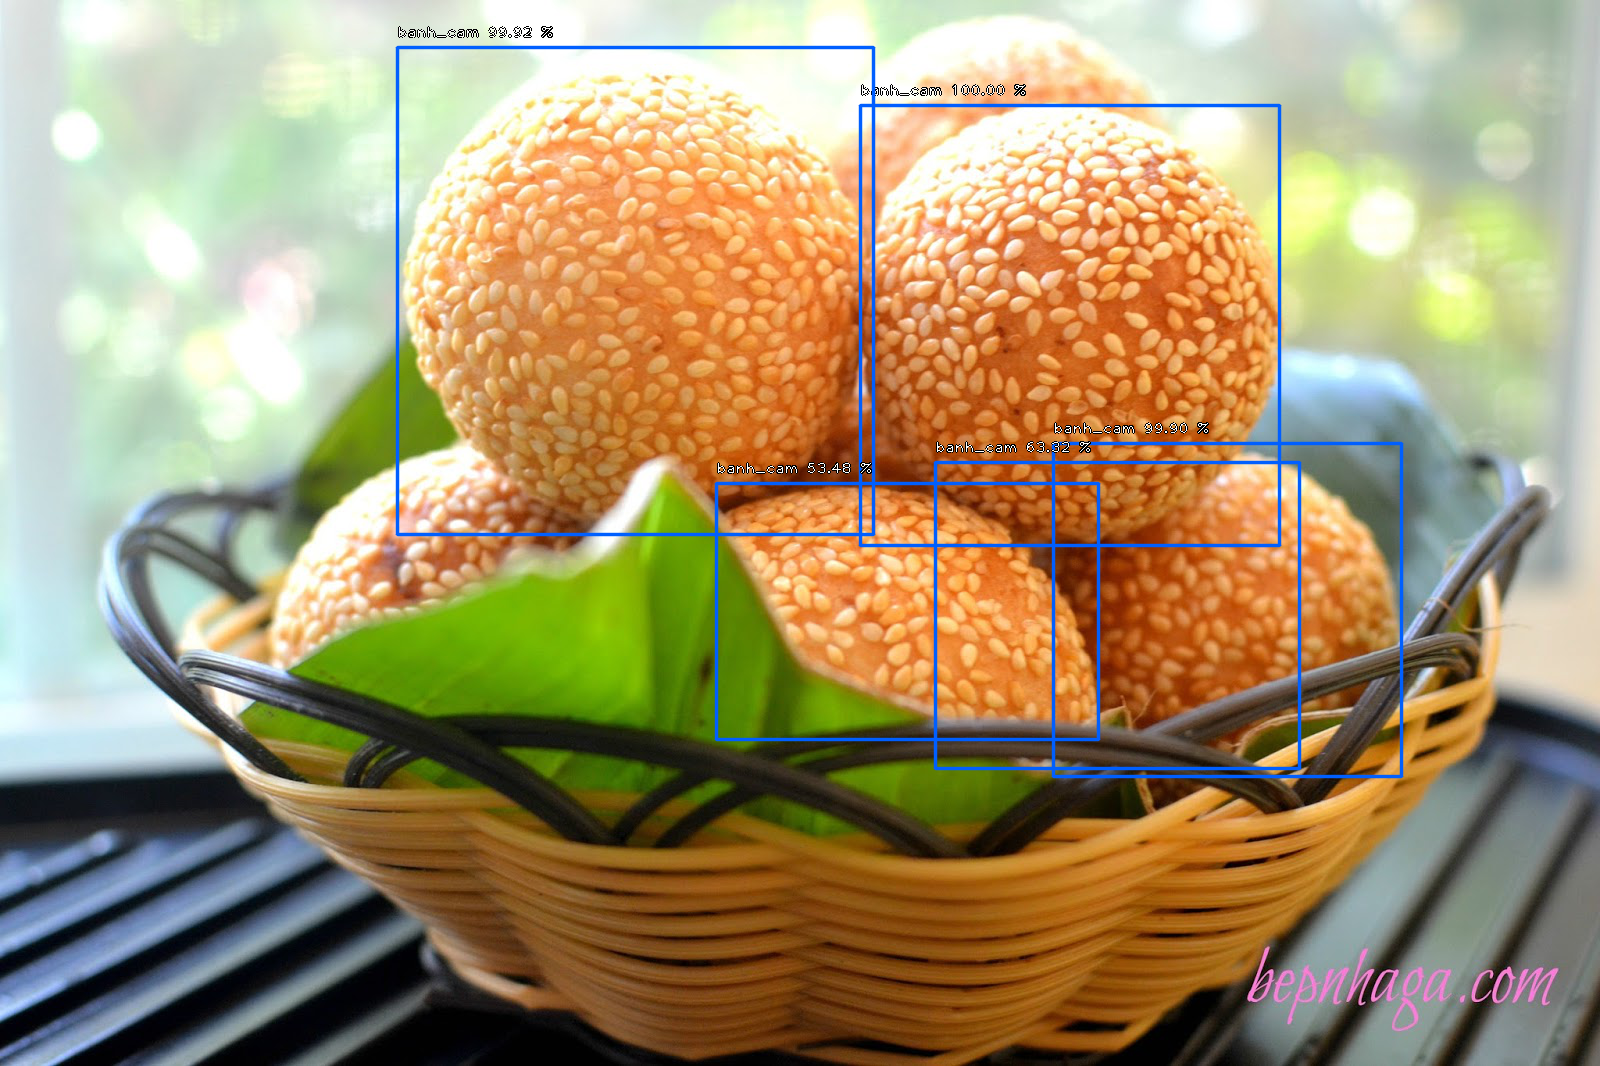

In [ ]:
# Bánh cam
cv2_imshow(draw_predict(img6))

### Predict with video

In [ ]:
count = 0
%cd /content/drive/MyDrive/DS201_DeepLearning_VNTF_22/dataset/
cap = cv2.VideoCapture('demo_default.mp4')
# cap = cv2.VideoCapture('data/za_traffic_2020/BienBaoGiaoThong_480.mp4')
# out = cv2.VideoWriter('result/video_result_720.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, (1280, 720))
out = cv2.VideoWriter('result/RetinaNet_720.mp4',cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), 30, (1280, 720))
# out = cv2.VideoWriter('result/video_result_480.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, (854, 480))

# Check if camera opened successfully
if (cap.isOpened()== False):
  print("Error opening video stream or file")

# Read until video is completed
while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        #Detect
        out.write(draw_predict(frame))
        count +=1
        print(count)

    # Break the loop
    else:
        break

# When everything done, release the video capture object
cap.release()
out.release()